# Homework 3

## Pair Programming Group Number: 19
## Members of Team: Marissa Green, Amar Vaswani

## Feature engineering and linear regression

For this week's homework we are going to load in a data set that isn't in the "cleanest", repair it, add a feature, do some analysis on the features, build a linear regression model, and use that model to estimate numeric values.  Is linear regression _really_ machine learning? Depends on who you ask, but it is definitely an important tool for data analytics. 

In [1]:
# only use these libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load in the melb_data_sold_train.csv file here
df = pd.read_csv('melb_data_sold_train.csv')

## Q1 Fix the dataframe to remove any blanks
The linear regression needs all attribute and dependent values to be defined.  Use list-wise deletion to remove entries with missing values. Save the modified dataframe with the indices reset to be $0-(length-1)$ into the variable `df1` for use in a later problem. 

In [2]:
df1 = df.dropna(axis=0, how = "any").reset_index(drop = True)

## Q2 Add a new feature
Toorak is known as one of the priciest suburbs in Melbourne.  Create a new column in your dataframe that is the distance in kilometers from the center of Toorak to the latitude/longitude of that row.  Use the latitude / longitude of $(-37.841820, 145.015986)$ for the center of Toorak.  You may assume the Earth is spherical and has radius of $6371.0088$km (check your function ... the property located at $(-37.68178,144.73779)$ is approx 30.2 km away)

In [3]:
# Step 1 : Define the Haversine distance as a function
# assumes that pt1 and pt2 are 2x1 [lat,long] np arrays that contain locations of the 2 earth coordinates in deg
# using the Haversine formula found https://en.wikipedia.org/wiki/Haversine_formula
def haversine_distance(pt1,pt2):
    lat_1_radians = np.radians(pt1[0])
    lon_1_radians = np.radians(pt1[1])
    lat_2_radians = np.radians(pt2[0])
    lon_2_radians = np.radians(pt2[1])
    
    lat_diff = lat_2_radians - lat_1_radians
    lon_diff = lon_2_radians - lon_1_radians

    hav_1 = (np.sin(lat_diff/2))**2 + np.cos(lat_1_radians)*np.cos(lat_2_radians)*(np.sin(lon_diff/2))**2
    
    hav_2 = 2 * np.arcsin(np.sqrt(hav_1))
    
    return 6371.0088 * hav_2

In [4]:
# A quick check to see if we are getting the expected value
toorak_pt = np.array([-37.841820, 145.015986])
haversine_distance(toorak_pt,[-37.68178,144.73779])

30.244772513569124

In [5]:
# Step 2 : Add a new column to `df1` called 'distance_to_toorak' that uses the haversine_distance function 
# to calculate the distance to Toorak for every row in our dataframe. Save the new dataframe as `df2`
#distance_to_toorak = np.array([haversine_distance(toorak_pt,[df1["Lattitude"],df1["Longtitude"]])])

#df2 = pd.concat([df1({"distance_to_toorak": haversine_distance(toorak_pt,[df1["Lattitude"],df1["Longtitude"]])}),df1], axis = 1)

# creating new column to later concatenate with df1
new_column = []

for i in range(len(df1)):
    a = (df1['Lattitude'].values[i])
    b = (df1['Longtitude'].values[i])
    new_column.append(haversine_distance(toorak_pt,[a,b]))
    
new_df = pd.DataFrame(new_column, columns = ["distance_to_toorak"])    

# concatenate them
df2 = pd.concat([df1,new_df], axis = 1)

## Q3 Create a one hot encoding for the categorical column 'Type'
Modify the data frame `df2` such that it removes the column for `Type` and replaces it with the appropriate number of columns for a one-hot encoding of the column `Type` and save that dataframe as `df3` for use in a later problem. The pandas method [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be very useful here. 

In [6]:
# add in dummy columns
df3 = pd.concat([df2,pd.get_dummies(df2["Type"])], axis = 1)

# remove old "Type" column
df3 = df3.drop(['Type'], axis=1)

## Q4 Calculate the pairwise correlations between all of your numeric attributes
Use the Pearson correlation as discussed in the lectures to calculate the pairwise correlations between the attributes in the dataframe `df3`. Read the documentation for [corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [7]:
df3.corr(method="pearson")

,Rooms,Price,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,distance_to_toorak,h,t,u
Rooms,1.000000,0.502814,0.054676,0.941684,0.593847,0.401716,0.085676,0.547816,-0.030447,0.012858,0.074846,0.232844,0.501128,-0.040762,-0.535102
Price,0.502814,1.000000,0.136468,0.480115,0.462985,0.223552,0.064029,0.465598,-0.330560,-0.224400,0.184597,-0.357013,0.391761,-0.095295,-0.372766
Postcode,0.054676,0.136468,1.000000,0.059311,0.122046,0.034698,0.014276,0.089355,0.035561,-0.445625,0.471934,0.008062,-0.040504,-0.008546,0.051754
Bedroom2,0.941684,0.480115,0.059311,1.000000,0.594920,0.403840,0.083237,0.532910,-0.010031,0.019970,0.076236,0.241515,0.484612,-0.037366,-0.518941
Bathroom,0.593847,0.462985,0.122046,0.594920,1.000000,0.322266,0.059483,0.470554,0.192470,-0.068643,0.109313,0.051662,0.181773,0.108148,-0.282390
Car,0.401716,0.223552,0.034698,0.403840,0.322266,1.000000,0.100686,0.299613,0.153313,-0.007839,0.032915,0.214759,0.214175,-0.006836,-0.236298
Landsize,0.085676,0.064029,0.014276,0.083237,0.059483,0.100686,1.000000,0.063136,0.028638,0.010734,0.013979,0.041420,0.047422,-0.067257,-0.005103
BuildingArea,0.547816,0.465598,0.089355,0.532910,0.470554,0.299613,0.063136,1.000000,0.024754,-0.047501,0.084074,0.076668,0.306231,-0.032396,-0.321614
YearBuilt,-0.030447,-0.330560,0.035561,-0.010031,0.192470,0.153313,0.028638,0.024754,1.000000,0.052205,0.023062,0.300236,-0.402670,0.331105,0.215689
Lattitude,0.012858,-0.224400,-0.445625,0.019970,-0.068643,-0.007839,0.010734,-0.047501,0.052205,1.000000,-0.366331,0.281684,0.121254,-0.028636,-0.115991


## Q5 Create a linear regression model to predict home values
Using the math in ESLII, section 3.2 equation (3.6) calculate $\hat{\beta}$

We are going to create a linear regression model using our numeric attribute columns in `df3`, and specifying the home values (`Price` column) as the value we are trying to predict.  You may use numpy to do matrix calculations, but you may not use a built in regression library (for example, you may not use scikt-learn). 

The features you use to build the matrix $X$ should all be numeric and include the distance to Toorak and the one hot encodings. 

In [30]:
# Step one, build the matrix X    
intercept = pd.DataFrame({"intercept":np.ones(len(df3))})
subset_df3 = df3.select_dtypes(include='number')
X = pd.concat([intercept, subset_df3], axis = 1)
#print(X)

Suburb                 object
Address                object
Rooms                   int64
Price                 float64
Date                   object
Postcode              float64
Bedroom2              float64
Bathroom              float64
Car                   float64
Landsize              float64
BuildingArea          float64
YearBuilt             float64
CouncilArea            object
Lattitude             float64
Longtitude            float64
Regionname             object
distance_to_toorak    float64
h                       uint8
t                       uint8
u                       uint8
dtype: object
      Rooms      Price  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0         2  1035000.0    3067.0       2.0       1.0  0.0     156.0   
1         3  1876000.0    3067.0       4.0       2.0  0.0     245.0   
2         2  1636000.0    3067.0       2.0       1.0  2.0     256.0   
3         2  1097000.0    3067.0       3.0       1.0  2.0     220.0   
4         2   750000.0    3067.

In [18]:
# Step two, build the column vector y
y = df3["Price"]
print(y)

0       1035000.0
1       1876000.0
2       1636000.0
3       1097000.0
4        750000.0
          ...    
3905     680000.0
3906     900000.0
3907    1200000.0
3908    1200000.0
3909     618350.0
Name: Price, Length: 3910, dtype: float64


In [19]:
# Step three, find beta hat per the formula (3.6) (you should use the library we used in class)
[beta_hat, residuals, rank, s] = np.linalg.lstsq(X, y, rcond=-1)
print(beta_hat)
beta_hat = beta_hat.reshape(4,1)

[1022731.47959438  -48084.170315    826559.10282447  402823.75527586]


In [20]:
# Test the model to see if we get something "reasonable" - i picked 23 at random 
np.dot(X.iloc[23], beta_hat) 

array([982682.19175])

In [21]:
# This is the actual price at this point
y[23]

805000.0

## Q6 Apply the linear regression model to the test data and visualize the error
We will cover other methods of evaluating any sort of prediction later, but for this week's exercise I have partitioned the data into two files.  Load the melb_data_sold_test.csv data set and use the $\hat{\beta}$ you calculated in the last step to predict the housing prices for data in melb_data_sold_test.  Create a visualization that shows the absolute error in your predictions. Remember to do all your data pre-processing on the data loaded from the melb_data_sold_test file before you apply beta_hat.  For the visualization, a histogram of the absolute error vs the total housing prices is sufficient.  Use [hist](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html) for reference. 

While doing imputation, there are some helpful parameters in [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). 

In [22]:
# Step zero, load the melb_data_sold_test.csv data for testing.  Use Imputation to fill in any missing numeric values
# We use imputation here instead of deletion since we want a prediction for _every_ row in the test file.
df4 = pd.read_csv("melb_data_sold_test.csv")
df4.fillna(df4.median())

,Suburb,Address,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname
0,Jacana,29 Fox Ct,3,h,620500.0,29/07/2017,3047.0,3.0,1.0,4.0,764.0,140.0,1973.0,Hume,-37.68907,144.91459,Northern Metropolitan
1,Keilor Park,45 Collinson St,3,h,750000.0,29/07/2017,3042.0,3.0,2.0,2.0,761.0,222.0,1980.0,Brimbank,-37.72224,144.85739,Western Metropolitan
2,Kensington,42 Gower St,3,h,1060000.0,29/07/2017,3031.0,3.0,1.0,0.0,190.0,140.0,1973.0,Melbourne,-37.79560,144.92779,Northern Metropolitan
3,Kew,6/385 Barkers Rd,3,t,1405000.0,29/07/2017,3101.0,3.0,2.0,2.0,325.0,129.0,1980.0,Boroondara,-37.81614,145.05056,Southern Metropolitan
4,Kew,11 Raheen Dr,4,h,3015000.0,29/07/2017,3101.0,4.0,2.0,2.0,813.0,276.0,1970.0,Boroondara,-37.80437,145.01725,Southern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,Wantirna South,15 Mara Cl,4,h,1330000.0,26/08/2017,3152.0,4.0,2.0,2.0,717.0,191.0,1980.0,NaN,-37.86887,145.22116,Eastern Metropolitan
1017,Werribee,5 Nuragi Ct,4,h,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,NaN,-37.89327,144.64789,Western Metropolitan
1018,Westmeadows,9 Black St,3,h,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,256.0,140.0,1973.0,NaN,-37.67917,144.89390,Northern Metropolitan
1019,Wheelers Hill,12 Strada Cr,4,h,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,652.0,140.0,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan


In [23]:
# Step one, add the new attribute for the 'distance_to_toorak' and the one hot encoding to the new data frame
# creating new column of distance_to_toorak for df4 values 
new_column_test = []
for i in range(len(df4)):
    a = (df4['Lattitude'].values[i])
    b = (df4['Longtitude'].values[i])
    new_column_test.append(haversine_distance(toorak_pt,[a,b]))
new_df_test = pd.DataFrame(new_column_test, columns = ["distance_to_toorak"])  

# concatenating distance_to_toorak column
df4 = pd.concat([df4,new_df_test], axis = 1)

# creating dummy columns
df4 = pd.concat([df4,pd.get_dummies(df4["Type"])], axis = 1)

In [24]:
# Step two, build the attribute matrix Xdot 
ones = pd.DataFrame({"intercept":np.ones(len(df4))})
Xdot = pd.concat([ones, df4.loc[:, ['distance_to_toorak', 'h', 't']]], axis = 1)

In [25]:
# Step three, multiply Xdot by Beta hat. DO NOT USE A LOOP.  This is a vector of predicted prices
# called y_hat in the notes
predicted_price = Xdot.dot(beta_hat)
print(len(predicted_price))

1021


In [34]:
# Step four, calculate the error vector, |actual price - predicted price|. We call this our "absolute error"
actual_price = pd.Series(df4['Price'].values)
absolute_error = (actual_price - predicted_price)[0].abs()

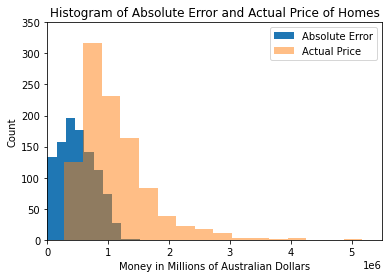

In [33]:
# Step five, create a histogram of the absolute error, and on the same plot create a histogram of the actual price.  
# You should use the "alpha" parameter to make the graph on top slightly translucent 
#bins_edges = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,1010000,1020000,1030000,1040000,absolute_error.max()]
plt.hist(absolute_error, label = "Absolute Error")
plt.hist(actual_price, bins=20, alpha=0.5, label = "Actual Price")
plt.xlabel("Money in Millions of Australian Dollars")
plt.xlim([0,5500000])
plt.ylim([0,350])
plt.ylabel("Count")
plt.title("Histogram of Absolute Error and Actual Price of Homes")
plt.legend()
plt.show()